In [1]:
import sys
import numpy as np
import pandas as pd
import pyemma
np.bool = np.bool_
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

!python -V

Python 3.11.9


In [2]:
import warnings
def plot_sampled_function(xall, yall, zall, ax=None, nbins=100, nlevels=20, cmap=plt.cm.bwr, cbar=True, cbar_label=None):
    # histogram data
    xmin = np.min(xall)
    xmax = np.max(xall)
    dx = (xmax - xmin) / float(nbins)
    ymin = np.min(yall)
    ymax = np.max(yall)
    dy = (ymax - ymin) / float(nbins)
    # bin data
    eps = x
    xbins = np.linspace(xmin - 0.5*dx, xmax + 0.5*dx, num=nbins)
    ybins = np.linspace(ymin - 0.5*dy, ymax + 0.5*dy, num=nbins)
    xI = np.digitize(xall, xbins)
    yI = np.digitize(yall, ybins)
    # result
    z = np.zeros((nbins, nbins))
    N = np.zeros((nbins, nbins))
    # average over bins
    for t in range(len(xall)):
        z[xI[t], yI[t]] += zall[t]
        N[xI[t], yI[t]] += 1.0

    with warnings.catch_warnings() as cm:
        warnings.simplefilter('ignore')
        z /= N
    # do a contour plot
    extent = [xmin, xmax, ymin, ymax]
    if ax is None:
        ax = plt.gca()
    ax.contourf(z.T, 100, extent=extent, cmap=cmap)
    if cbar:
        cbar = plt.colorbar()
        if cbar_label is not None:
            cbar.ax.set_ylabel(cbar_label)

    return ax

In [3]:
def plot_sampled_density(xall, yall, zall, ax=None, nbins=100, cmap=plt.cm.Blues, cbar=True, cbar_label=None):
    return plot_sampled_function(xall, yall, zall, ax=ax, nbins=nbins, cmap=cmap, cbar=cbar, cbar_label=cbar_label)

In [4]:
#Ntrajs=1000
#trajs=[ pd.read_csv('cv_input_tica_symm/cv_input_tica_r%d.csv'%(i+1),index_col=1) for i in range(Ntrajs) ]
#trajs=pd.concat(trajs,keys=range(1,Ntrajs+1),names=['run','frame'])
#trajs =pd.read_csv("canonical_300mM_new_cv.csv",  usecols=["Frame", "RUNID", "CV1", "CV2", "CV3", "CV4", "CV5", "CV6", "CV7", "CV8", "dist_entry", "dist_exit"])

#trajs.set_index(["RUNID", "Frame"], inplace=True)
trajs1  =pd.read_csv("tetra_200mM_800.csv",  usecols=["Frame", "RUNID", "CV1", "CV2", "Rg1", "Rg2", "dist_entry","dist_exit"])
trajs1.set_index(["RUNID", "Frame"], inplace=True)
trajs1["combine"] = trajs1.apply(lambda x: x["CV1"]/2 + x["CV2"]/2, axis=1)
#trajs_p = pd.concat([trajs, trajs1], axis=1)
#trajs2 = trajs.merge(trajs1[["Rg1", "Rg2"]], on="RUNID")

#Ntrajs=1000
#trajs=[ pd.read_csv('cv_input_tica_symm/cv_input_tica_r%d.csv'%(i+1),index_col=1) for i in range(Ntrajs) ]
#trajs=pd.concat(trajs,keys=range(1,Ntrajs+1),names=['run','frame'])
#trajs2 =pd.read_csv("new_300mM_new_cv.csv",  usecols=["Frame", "RUNID", "CV1", "CV2", "CV3", "CV4", "CV5", "CV6", "CV7", "CV8", "dist_entry", "dist_exit"])
#print(trajs.index.duplicated().sum())
#trajs2.set_index(["RUNID", "Frame"], inplace=True)
#trajs3  =pd.read_csv("tetra_new_200mM_800.csv",  usecols=["Frame", "RUNID", "CV1", "CV2", "Rg1", "Rg2", "dist_entry","dist_exit"])
#trajs3.set_index(["RUNID", "Frame"], inplace=True)
#trajs3["combine"] = trajs3.apply(lambda x: x["CV1"]/2 + x["CV2"]/2, axis=1)

#trajs_r = pd.concat([trajs2, trajs3], axis=1)

#new = trajs1.loc[[idx[0] < 700.0 for idx in trajs1.index]]

#print (trajs_r.index)
#trajs_f = pd.concat([new, trajs3])
#trajs_f

In [5]:
trajs1

CV1       CV2        Rg1        Rg2   dist_exit  \
RUNID Frame                                                          
0.0   1.0     0.879694  0.833824  46.059511  46.099773   44.852384   
      2.0     0.879724  0.858039  45.880157  45.769936   42.236765   
      3.0     0.913025  0.920293  47.328579  47.287461   71.311331   
      4.0     0.863577  0.906182  47.484713  47.506233   72.370438   
      5.0     0.852670  0.972550  46.990815  47.077883   67.610257   
...                ...       ...        ...        ...         ...   
799.0 996.0   0.071417  0.114993  88.244194  88.024879  200.800312   
      997.0   0.075149  0.116938  86.894265  86.732933  205.343448   
      998.0   0.086090  0.108670  85.876560  85.665163  214.833417   
      999.0   0.094609  0.112304  82.863120  82.586784  207.148906   
      1000.0  0.085192  0.119440  83.452694  83.408578  190.902873   

              dist_entry   combine  
RUNID Frame                         
0.0   1.0      59.416345  0.856759  
      2.0      49.228395  0.868881  
      3.0      42.189345  0.916659  
      4.0      34.426333  0.884879  
      5.0      38.135509  0.912610  
...                  ...       ...  
799.0 996.0   198.278209  0.093205  
      997.0   197.902456  0.096044  
      998.0   173.934116  0.097380  
      999.0   173.079658  0.103456  
      1000.0  169.528867  0.102316  

[800000 rows x 7 columns]

In [6]:
ctrajs = [ trajs1.loc[i,["CV1", "CV2", "combine", "Rg1", "Rg2", "dist_entry", "dist_exit"]].values for i in trajs1.index.get_level_values(0).unique() ]
inp_tica=coor.source(ctrajs)
ctrajs[0].shape

(1000, 7)

In [9]:
tica_obj = coor.tica(inp_tica, lag=10, var_cutoff=0.95, kinetic_map=True)
print (tica_obj)
tica_obj.dimension()

/Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                              | 0/800 [00:00<?, ?it/s]

TICA(commute_map=False, dim=-1, epsilon=1e-06, kinetic_map=True, lag=10,
   ncov_max=inf, reversible=True, skip=0, stride=1, var_cutoff=0.95,
   weights=None)


5

In [10]:
Y = tica_obj.get_output() # get tica coordinates
print('number of trajectories = ', np.shape(Y)[0])
print('number of frames = ', np.shape(Y)[1])
print('number of dimensions = ',np.shape(Y)[2])

getting output of TICA:   0%|                                             | 0/800 [00:00<?, ?it/s]

number of trajectories =  800
number of frames =  1000
number of dimensions =  5


In [11]:
def plot_labels(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.text(-2, -4.7, '1', fontsize=20, color='black')   
 
    ax.text(-1.2, -5, '2', fontsize=20, color='black')
    ax.text(-4.2, 1.5, '3', fontsize=20, color='black')
    ax.text(-0.1, 0, '4', fontsize=20, color='white')
    


RuntimeError: You must first define an image, e.g., with imshow

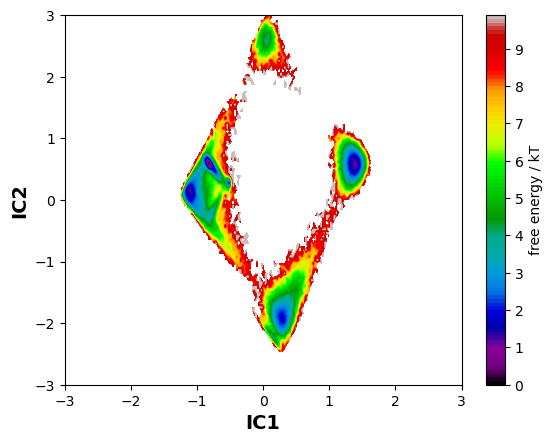

(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 [Text(0, -6.0, '−6'),
  Text(0, -4.0, '−4'),
  Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6')])

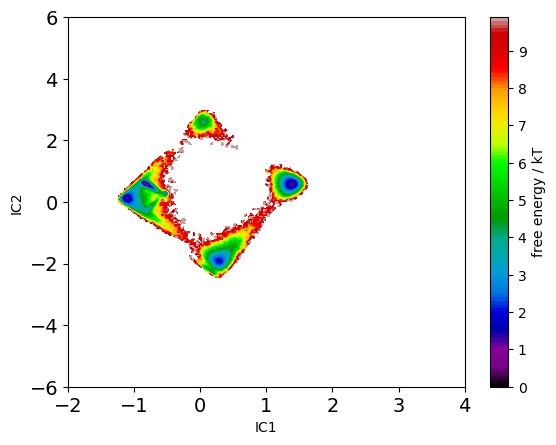

In [24]:
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1], vmin=0, vmax=10);
plt.ylim(-6.0, 6.0)
plt.xlim(-2.0, 4.0)
plt.xlabel("IC1")
plt.ylabel("IC2")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


/Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/lokesh/miniconda3/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


initialize kmeans++ centers:   0%|                                  | 0/400 [00:00<?, ?it/s]

kmeans iterations:   0%|                                             | 0/50 [00:00<?, ?it/s]

15-12-24 14:42:34 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


/Users/lokesh/miniconda3/lib/python3.11/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"
/Users/lokesh/miniconda3/lib/python3.11/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


getting output of KmeansClustering:   0%|                           | 0/800 [00:00<?, ?it/s]

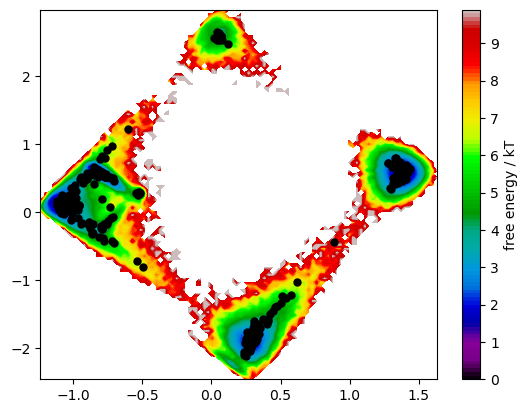

In [11]:
n_clusters = 400
clustering = coor.cluster_kmeans(Y, k=n_clusters, max_iter=50)
dtrajs = clustering.dtrajs
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = clustering.clustercenters[:,0]
cc_y = clustering.clustercenters[:,1]
plt.plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
plt.savefig("TICA_canonical.pdf")

estimating BayesianMSM:   0%|                                        | 0/12 [00:00<?, ?it/s]

<Axes: xlabel='lag time / steps', ylabel='timescale / steps'>

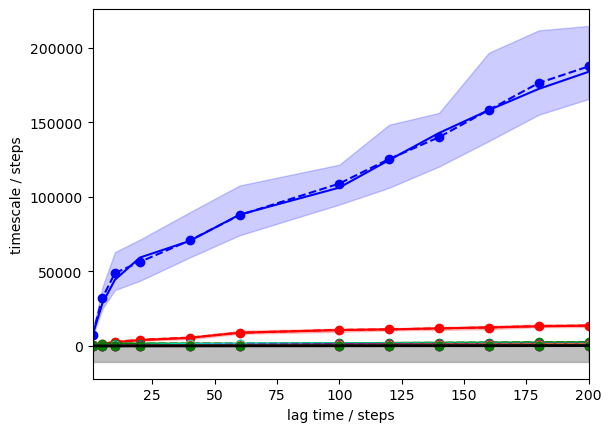

In [12]:
#its = msm.timescales_msm(dtrajs, lags=200, nits=10)
its= msm.timescales_msm(dtrajs,lags=[1,5,10,20,40,60,100,120, 140, 160,180,200],nits=5, errors="bayes")
mplt.plot_implied_timescales(its,ylog=False)

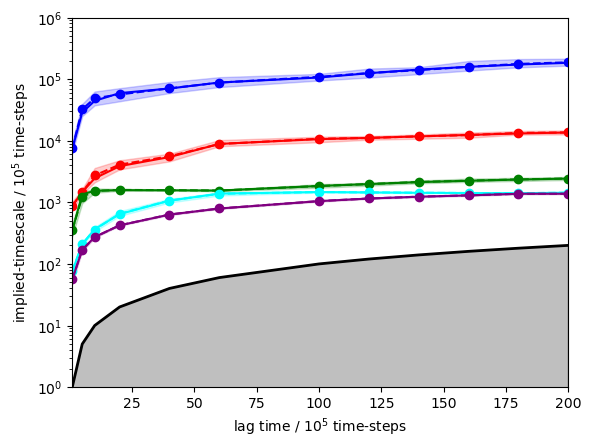

In [22]:
mplt.plot_implied_timescales(its,nits=5, ylog=True)
plt.ylim(1, 1e6) 
plt.xlabel(r'lag time / $10^5$ time-steps')
plt.ylabel(r'implied-timescale / $10^5$ time-steps')

plt.savefig('msm_its.pdf')

In [51]:
msm_lag = 20
M = msm.estimate_markov_model(dtrajs, msm_lag)
print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

fraction of states used =  1.0
fraction of counts used =  1.0


In [52]:
n_sets=11
M.pcca(n_sets)
cl_to_pccaset=np.argmax(M.metastable_memberships,axis=1)
len(M.active_set)
len(M.active_set)
# test MSM
#M = msm.bayesian_markov_model(dtrajs, msm_lag)

400

In [53]:
hmm = M.coarse_grain(11)


#ck = M.cktest(4, mlags=11, err_est=False)

11-11-24 19:07:00 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[24] WARNING  Requested coarse-grained model with 11 metastable states at lag=20. The ratio of relaxation timescales between 11 and 12 states is only 1.088330341369141 while we recommend at least 1.5. It is possible that the resulting HMM is inaccurate. Handle with caution.


MaximumLikelihoodHMSM(accuracy=0.001, connectivity=None, dt_traj='1 step',
           lag=20, maxit=1000, mincount_connectivity=0.09090909090909091,
           msm_init=MaximumLikelihoodMSM(connectivity='largest', core_set=None,
           count_mode='sliding', dt_traj='1 step', lag=20, maxerr=1e-08,
           maxiter=1000000, milestoning_method='last_core',
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None),
           nstates=11, observe_nonempty=True, reversible=True,
           separate=None, stationary=False, stride=1)
[4.63370046 3.45685395 3.47895604 1.71138774 2.60323784 2.43225846
 1.98780491 1.8185614  2.49360821 0.67237084 0.41384981]


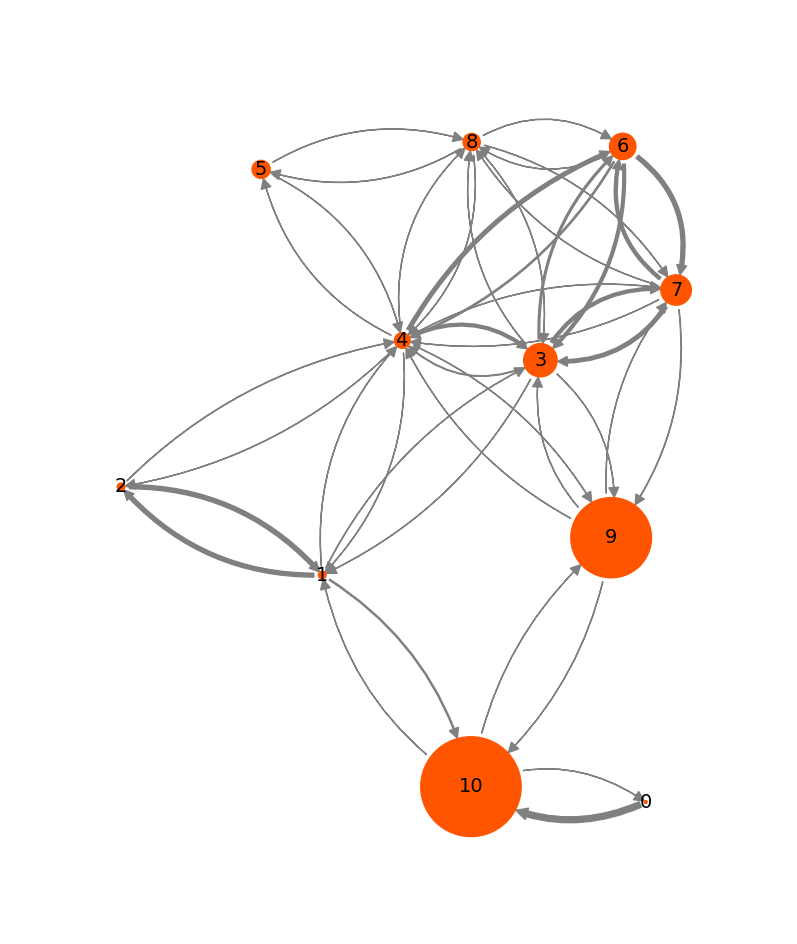

In [54]:
import pickle
file_hmm = open("hmm_800.obj", "wb")
pickle.dump(hmm, file_hmm)
import numpy as np
#print (type(hmm))

file_hmm1 = open("hmm_800.obj", "rb")
hmm1 = pickle.load(file_hmm1)
print (hmm1)
hmm_energies1 = -np.log(hmm1.stationary_distribution)
print (hmm_energies1*0.59)

#ck = M.cktest(4, mlags=11, err_est=False)


plt.rcParams.update({'font.size': 14})
mplt.plot_markov_model(hmm, arrow_labels=None)
plt.savefig("hmm_canonical111.pdf")

In [57]:
# set the cluster
#trajs=trajs.set_index()
trajs_f=trajs_f.assign(pccaset=cl_to_pccaset[np.hstack(dtrajs)])
trajs_f=trajs_f.assign(cl=np.hstack(dtrajs))# set the cluster
# set the probability to be in the top pcca set
trajs_f=trajs_f.assign(pcca_prob=np.max(M.metastable_memberships[trajs_f.cl],axis=1))
trajs_f

for i in range(n_sets):
    trajs_f.query('pccaset==%d'%i).sort_values(by='pcca_prob', ascending=False).pcca_prob.to_csv('pccaset%d.csv'%i)